<h1><center> Python Analytics Project </center></h1>

<center> <b><i>Team</i></b>: Karishma Velagaleti | Jiang Shang | Aditya Tripathi | Satyarth Poppasani </center>
<center> <b><i>Data Set </i></b>: HongKong Horse Racing Data-set</center>
<center> <b><i>Problem Statement</i></b>: Analytics for HongKong horse-race betting </center>

#### <center><b><i>Notebook 1: EXPLORATORY AND PREDICTIVE ANALYSIS</i></b></center>

# Part I : Exploratory Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
%matplotlib inline

In [4]:
df1=pd.read_csv('race-result-horse.csv')
# drop horse_name, since we have horse_id as reference. Redadant column
df1=df1.drop('horse_name',axis=1)


df2=pd.read_csv('race-result-race.csv', encoding='latin-1')
# drop src, useless column
df2=df2.drop('src',axis=1)

In [3]:
df1.head(2)

,finishing_position,horse_number,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,running_position_2,running_position_3,running_position_4,finish_time,win_odds,running_position_5,running_position_6,race_id
0,1,1.0,K019,B Prebble,D Cruz,133.0,1032.0,1.0,-,1.0,2.0,2.0,1.0,1.22.33,3.8,NaN,NaN,2014-001
1,2,2.0,S070,D Whyte,D E Ferraris,133.0,1075.0,13.0,2,8.0,9.0,9.0,2.0,1.22.65,8.0,NaN,NaN,2014-001


In [4]:
# This dataset contains in total 1561 different races
df1.race_id.unique().shape

(1561,)

In [5]:
# There are in total 88 different jockeys
df1.jockey.unique().shape

(88,)

In [6]:
# There are in total 77 different trainers
df1.trainer.unique().shape

(77,)

In [7]:
# There are in total 1747 different horses
df1.horse_id.unique().shape

(1747,)

## Out of 1561 races, what is the possibility that horse_number==1, and draw is also ==1?

In [8]:
temp=df1[(df1['horse_number']==1)&(df1['draw']==1)]
temp

,finishing_position,horse_number,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,running_position_2,running_position_3,running_position_4,finish_time,win_odds,running_position_5,running_position_6,race_id
0,1,1.0,K019,B Prebble,D Cruz,133.0,1032.0,1.0,-,1.0,2.0,2.0,1.0,1.22.33,3.8,NaN,NaN,2014-001
133,13,1.0,N324,B Prebble,J Size,133.0,1211.0,1.0,7,10.0,11.0,13.0,NaN,0.56.90,37.0,NaN,NaN,2014-009
210,7,1.0,P301,A Suborics,A S Cruz,133.0,1183.0,1.0,5,2.0,3.0,7.0,NaN,0.56.88,31.0,NaN,NaN,2014-017
405,2,1.0,P425,J Moreira,S Woods,133.0,1100.0,1.0,N,7.0,8.0,9.0,2.0,1.40.67,2.9,NaN,NaN,2014-034
446,9,1.0,P082,K C Ng,C H Yip,128.0,1052.0,1.0,3-3/4,10.0,13.0,9.0,NaN,0.56.99,30.0,NaN,NaN,2014-037
481,6,1.0,M391,D Whyte,C H Yip,131.0,1113.0,1.0,2,9.0,7.0,7.0,6.0,1.35.48,9.5,NaN,NaN,2014-039
563,9,1.0,S221,M Chadwick,A S Cruz,133.0,1087.0,1.0,3-3/4,5.0,7.0,8.0,9.0,1.35.06,9.2,NaN,NaN,2014-045
610,1,1.0,S070,D Whyte,D E Ferraris,133.0,1074.0,1.0,-,9.0,7.0,6.0,1.0,1.23.41,3.1,NaN,NaN,2014-050
852,2,1.0,N111,Z Purton,P O'Sullivan,133.0,1092.0,1.0,1,6.0,6.0,5.0,2.0,1.39.96,4.8,NaN,NaN,2014-071
1227,11,1.0,S160,A Suborics,C S Shum,133.0,997.0,1.0,10,3.0,2.0,11.0,NaN,1.11.81,7.8,NaN,NaN,2014-099


In [9]:
# It appears out of 1561 races, there are 124 cases in which horse_num ==1 & draw ==1
print(temp.race_id.unique().shape)
print('The possibility of horse_numer is 1 whose draw is also 1 is',
     temp.race_id.unique().shape[0]/df1.race_id.unique().shape[0])

(124,)
The possibility of horse_numer is 1 whose draw is also 1 is 0.07943625880845612


## In these 124 cases where there is the apparent advantage, can they always win?

In [10]:
# I don't know how to sort a list like this so I'm mannually reordering this list
finishing_position=temp['finishing_position'].unique().tolist()
print(finishing_position)
finishing_position=['1','2','3','4','5','6','6 DH','7','8','9','10','11','12','13','14','DISQ','UR']
print(finishing_position)

['1', '13', '7', '2', '9', '6', '11', '3', '14', '12', '10', 'DISQ', '5', '8', '4', 'UR', '6 DH']
['1', '2', '3', '4', '5', '6', '6 DH', '7', '8', '9', '10', '11', '12', '13', '14', 'DISQ', 'UR']


In [11]:
frequency=[]
for i in finishing_position:
    a=sum(temp.finishing_position==i)
    frequency.append(a)
print(frequency)

[17, 17, 12, 6, 17, 9, 1, 4, 8, 12, 6, 2, 3, 5, 3, 1, 1]


In [12]:
density=[]
for i in frequency:
    a=i/124
    density.append('%'+str(round((a*100),2)))
print(density)

['%13.71', '%13.71', '%9.68', '%4.84', '%13.71', '%7.26', '%0.81', '%3.23', '%6.45', '%9.68', '%4.84', '%1.61', '%2.42', '%4.03', '%2.42', '%0.81', '%0.81']


'Wow,even with an obvious advantage, these horses do not nescessarily win. The 1st and 2nd place only account for\n  13.71% * 2=27.42%, meaning that we still have more than 70% chance of losing our bet if we simply think\n  best horse + best draw = winning.'

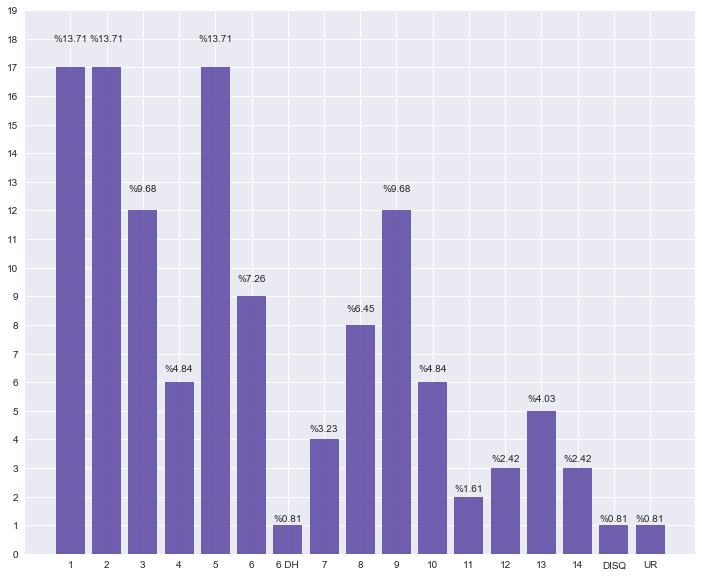

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
rects = ax.bar(range(len(finishing_position)),frequency,align='center',alpha=0.9,width=0.8,color='#624ea7')
plt.xticks(range(len(finishing_position)), finishing_position)
plt.yticks(range(0,20,1))
pass

def autolabel(rects):
    x=iter(density)
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                next(x),
                ha='center', va='bottom')

autolabel(rects)

'''Wow,even with an obvious advantage, these horses do not nescessarily win. The 1st and 2nd place only account for
  13.71% * 2=27.42%, meaning that we still have more than 70% chance of losing our bet if we simply think
  best horse + best draw = winning.'''

# Part II : Model Construction

## Now let's merge the ds on race_id and run a RandomForest to detect feature importance

In [292]:
df3=pd.merge(df1,df2,on='race_id')

In [293]:
df3.head(2)

,finishing_position,horse_number,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,...,race_date,race_course,race_number,race_class,race_distance,track_condition,race_name,track,sectional_time,incident_report
0,1,1.0,K019,B Prebble,D Cruz,133.0,1032.0,1.0,-,1.0,...,2014-09-14,Sha Tin,1,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",13.59 22.08 23.11 23.55,\n When about to enter the trac...
1,2,2.0,S070,D Whyte,D E Ferraris,133.0,1075.0,13.0,2,8.0,...,2014-09-14,Sha Tin,1,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",13.59 22.08 23.11 23.55,\n When about to enter the trac...


In [107]:
df3.finishing_position.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       'WV-A', '14', 'WV', '9 DH', '2 DH', 'WX', 'PU', '1 DH', '8 DH',
       'UR', 'FE', '4 DH', '10 DH', 'TNP', '5 DH', 'DISQ', '11 DH',
       '12 DH', '3 DH', '7 DH', 'WX-A', 'DNF', '6 DH', nan], dtype=object)

In [16]:
# I'm selecting out all the 2016 data as my test set, all the rest of my data as my training set.
date=[]
for i in df3.race_date:
    if '2016' in i:
        date.append(i)

# Now df_2016 is my test set
df_2016=df3.loc[df3['race_date'].isin(date)]
df_2016.head(3)

,finishing_position,horse_number,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,...,race_date,race_course,race_number,race_class,race_distance,track_condition,race_name,track,sectional_time,incident_report
13653,1,12.0,S246,N Callan,C Fownes,123.0,990.0,3.0,-,4.0,...,2016-01-01,Sha Tin,1,Class 5,1400,GOOD,WONG LENG HANDICAP,"TURF - ""B+2"" COURSE",13.79 22.14 23.49 23.88,"\n As the start was effected, D..."
13654,2,11.0,S193,K C Leung,L Ho,121.0,1045.0,10.0,HD,10.0,...,2016-01-01,Sha Tin,1,Class 5,1400,GOOD,WONG LENG HANDICAP,"TURF - ""B+2"" COURSE",13.79 22.14 23.49 23.88,"\n As the start was effected, D..."
13655,3,1.0,T063,H W Lai,A Lee,132.0,1172.0,14.0,N,8.0,...,2016-01-01,Sha Tin,1,Class 5,1400,GOOD,WONG LENG HANDICAP,"TURF - ""B+2"" COURSE",13.79 22.14 23.49 23.88,"\n As the start was effected, D..."


In [17]:
# Now I know in the orignial dataframe df3, all the 2016 data are contained in row 13653 all the way till the end.
# I can use these index to divide up my training and test set later when I finish transforming categorical data.
for i in df_2016.index.values:
    print(i)

13653
13654
13655
13656
13657
13658
13659
13660
13661
13662
13663
13664
13665
13666
13667
13668
13669
13670
13671
13672
13673
13674
13675
13676
13677
13678
13679
13680
13681
13682
13683
13684
13685
13686
13687
13688
13689
13690
13691
13692
13693
13694
13695
13696
13697
13698
13699
13700
13701
13702
13703
13704
13705
13706
13707
13708
13709
13710
13711
13712
13713
13714
13715
13716
13717
13718
13719
13720
13721
13722
13723
13724
13725
13726
13727
13728
13729
13730
13731
13732
13733
13734
13735
13736
13737
13738
13739
13740
13741
13742
13743
13744
13745
13746
13747
13748
13749
13750
13751
13752
13753
13754
13755
13756
13757
13758
13759
13760
13761
13762
13763
13764
13765
13766
13767
13768
13769
13770
13771
13772
13773
13774
13775
13776
13777
13778
13779
13780
13781
13782
13783
13784
13785
13786
13787
13788
13789
13790
13791
13792
13793
13794
13795
13796
13797
13798
13799
13800
13801
13802
13803
13804
13805
13806
13807
13808
13809
13810
13811
13812
13813
13814
13815
13816
13817
13818
1381

In [18]:
# df_ow is my training set which contains everything besides the 2016 data
df_ow=df3.loc[~df3['race_date'].isin(date)]
df_ow.head(3)

,finishing_position,horse_number,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,...,race_date,race_course,race_number,race_class,race_distance,track_condition,race_name,track,sectional_time,incident_report
0,1,1.0,K019,B Prebble,D Cruz,133.0,1032.0,1.0,-,1.0,...,2014-09-14,Sha Tin,1,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",13.59 22.08 23.11 23.55,\n When about to enter the trac...
1,2,2.0,S070,D Whyte,D E Ferraris,133.0,1075.0,13.0,2,8.0,...,2014-09-14,Sha Tin,1,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",13.59 22.08 23.11 23.55,\n When about to enter the trac...
2,3,10.0,P072,Y T Cheng,Y S Tsui,121.0,1065.0,3.0,2,2.0,...,2014-09-14,Sha Tin,1,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",13.59 22.08 23.11 23.55,\n When about to enter the trac...


In [19]:
index_testset=df_2016.index.values
index_testset

array([13653, 13654, 13655, ..., 19993, 19994, 19995])

In [20]:
index_trainingset=df_ow.index.values
index_trainingset

array([    0,     1,     2, ..., 13650, 13651, 13652])

## But first we need to transform categorical data into workable ones.

In [21]:
# First I get rid of those "future" columns that are not gonna help me in prediction, 
# e.g. we won't know the running_position of each horse until the begining of the race.
x_labels=[i for i in df3.columns if i not in['finishing_position','length_behind_winner',
                                            'running_position_1','running_position_2',
                                            'running_position_3','running_position_4',
                                            'running_position_5','running_position_6',
                                            'sectional_time','incident_report','finish_time']]
print(x_labels)
print(len(x_labels))

['horse_number', 'horse_id', 'jockey', 'trainer', 'actual_weight', 'declared_horse_weight', 'draw', 'win_odds', 'race_id', 'race_date', 'race_course', 'race_number', 'race_class', 'race_distance', 'track_condition', 'race_name', 'track']
17


In [22]:
# This is just to create a "dummy" dataframe so that I can override it later.
df_objects=pd.DataFrame(df3.race_id,columns=['dummy'])

In [297]:
df3.shape

(19996, 28)

In [23]:
# Now I've picked out these columns in x_labels whose dtype is objects. I'm converting them into int dtype.

objects=['horse_id','jockey','trainer','race_id','race_date',
        'race_course','race_class','track_condition','race_name','track']

for i in objects:
    le = preprocessing.LabelEncoder()
    le.fit(df3[i])
    le.transform(df3[i])
    df_objects[i]=pd.Series(le.transform(df3[i]))

# don't forget to drop my dummy column
df_objects.drop('dummy',axis=1,inplace=True)    
    
df_objects.head(3)

,horse_id,jockey,trainer,race_id,race_date,race_course,race_class,track_condition,race_name,track
0,3,5,15,0,0,1,7,2,864,1
1,700,22,16,0,0,1,7,2,864,1
2,381,85,74,0,0,1,7,2,864,1


In [24]:
# This are the columns whose dtype are int/float in the first place.
df_int = df3.loc[:,['horse_number','actual_weight','declared_horse_weight',
                    'draw','win_odds','race_number','race_distance']]

In [25]:
# Now let me concatenate them together
df_x = pd.concat([df_int, df_objects], axis=1)
df_x.head(3)

,horse_number,actual_weight,declared_horse_weight,draw,win_odds,race_number,race_distance,horse_id,jockey,trainer,race_id,race_date,race_course,race_class,track_condition,race_name,track
0,1.0,133.0,1032.0,1.0,3.8,1,1400,3,5,15,0,0,1,7,2,864,1
1,2.0,133.0,1075.0,13.0,8.0,1,1400,700,22,16,0,0,1,7,2,864,1
2,10.0,121.0,1065.0,3.0,5.7,1,1400,381,85,74,0,0,1,7,2,864,1


## Deal with missing values

In [26]:
index_draw_null=df_x[df_x.draw.isnull()].index.values
index_draw_null

array([   13,   120,   225,   273,   274,   403,   415,   437,   451,
         500,   599,   600,   623,   704,   715,   813,   877,   925,
         951,   952,   967,  1036,  1180,  1240,  1287,  1359,  1426,
        1439,  1440,  1494,  1645,  1685,  1736,  1737,  1752,  1807,
        1980,  1995,  2010,  2025,  2141,  2166,  2246,  2260,  2275,
        2375,  2410,  2411,  2502,  2503,  2504,  2610,  2611,  2698,
        2739,  2854,  2915,  2975,  3013,  3052,  3149,  3190,  3315,
        3329,  3330,  3475,  3490,  3503,  3543,  3568,  3611,  3650,
        3739,  3824,  3903,  3918,  3933,  3993,  4030,  4137,  4162,
        4286,  4287,  4340,  4454,  4455,  4509,  4673,  4710,  4736,
        4750,  4815,  4826,  4827,  4842,  4966,  5021,  5157,  5172,
        5173,  5270,  5383,  5444,  5506,  5608,  5705,  5841,  5986,
        6011,  6024,  6117,  6196,  6236,  6284,  6556,  6648,  6663,
        6713,  6728,  6755,  6767,  6782,  6833,  6905,  6934,  6961,
        7017,  7030,

In [27]:
# draw column contains 401 rows of Nan value

df_x=df_x[df_x.draw.notnull()]

# After dropping these rows, we've got 15959 rows from the original 19996 rows. 
# We've get rid of 401 rows, which is a considerably small amount.

df_x.isnull().values.any()

False

## DH just means there are more than 1 horse in that finishing_position, so I'm getting rid of all the DHs

In [28]:
a=df3.finishing_position.astype(str)

In [29]:
a.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       'WV-A', '14', 'WV', '9 DH', '2 DH', 'WX', 'PU', '1 DH', '8 DH',
       'UR', 'FE', '4 DH', '10 DH', 'TNP', '5 DH', 'DISQ', '11 DH',
       '12 DH', '3 DH', '7 DH', 'WX-A', 'DNF', '6 DH', 'nan'], dtype=object)

In [30]:
a.unique().shape

(37,)

In [31]:
len(['9 DH','2 DH','1 DH','8 DH','4 DH','10 DH','5 DH','11 DH','12 DH','3 DH','7 DH','6 DH'])

12

In [32]:
a.replace(['9 DH','2 DH','1 DH','8 DH','4 DH','10 DH','5 DH','11 DH','12 DH','3 DH','7 DH','6 DH'],
         ['9','2','1','8','4','10','5','11','12','3','7','6'],inplace=True)

In [ ]:
a.unique.shape

## Also, I'm changing all the special incidences to value 0 since there are only 47 rows report to special incidence

In [125]:
# There are 47 rows whose finishing_position reports as a special incidence
temp2=df3[(df3.finishing_position.isin(b)) & (df3.draw.notnull())]
temp2.head(3)

,finishing_position,horse_number,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,...,race_date,race_course,race_number,race_class,race_distance,track_condition,race_name,track,sectional_time,incident_report
680,PU,10.0,S434,K C Leung,C S Shum,121.0,1094.0,14.0,-,10.0,...,2014-10-01,Sha Tin,9,Class 3,1400,GOOD TO FIRM,TIANJIN HANDICAP,"TURF - ""C+3"" COURSE",13.59 21.28 23.12 23.45,"\n After being loaded, FOODIE b..."
1037,PU,5.0,P253,N Rawiller,J Size,124.0,1130.0,9.0,-,4.0,...,2014-10-12,Sha Tin,9,Class 3,1400,GOOD TO FIRM,CLEAR WATER BAY HANDICAP,"TURF - ""A+3"" COURSE",13.50 21.83 23.89 22.98,\n FASHION MAESTRO was withdraw...
1413,UR,8.0,M212,W M Lai,K L Man,124.0,1085.0,9.0,-,NaN,...,2014-10-26,Sha Tin,3,Class 5,1400,GOOD TO FIRM,PIAGET EXCELLENT HANDICAP,"TURF - ""B+2"" COURSE",13.48 21.89 23.02 24.12,"\n On entering the track, A Sub..."


In [127]:
temp2.shape

(47, 28)

In [108]:
b=['WV-A','WV', 'WX', 'PU', 'UR', 'FE', 'TNP', 'DISQ', 'WX-A',
       'DNF', 'nan']

In [132]:
a.replace(b,'0',inplace=True)

In [133]:
a.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '0', '14'], dtype=object)

In [135]:
a.unique().shape

(15,)

In [136]:
# Now let's transform Y, the label we are trying to predict, which is the finishing_position

le = preprocessing.LabelEncoder()
le.fit(a)
df_y=pd.DataFrame(le.transform(a),columns=['finishing_position'])

# drop the same rows (of df_x) for df_y

df_y.drop(df_y.index[index_draw_null],inplace=True)

In [137]:
df_x.head(3)

,horse_number,actual_weight,declared_horse_weight,draw,win_odds,race_number,race_distance,horse_id,jockey,trainer,race_id,race_date,race_course,race_class,track_condition,race_name,track
0,1.0,133.0,1032.0,1.0,3.8,1,1400,3,5,15,0,0,1,7,2,864,1
1,2.0,133.0,1075.0,13.0,8.0,1,1400,700,22,16,0,0,1,7,2,864,1
2,10.0,121.0,1065.0,3.0,5.7,1,1400,381,85,74,0,0,1,7,2,864,1


In [138]:
df_y.head(3)

,finishing_position
0,1
1,7
2,8


In [139]:
index_testset=df_2016.index.values
index_testset

array([13653, 13654, 13655, ..., 19993, 19994, 19995])

In [140]:
index_trainingset=df_ow.index.values
index_trainingset

array([    0,     1,     2, ..., 13650, 13651, 13652])

In [265]:
x_training=df_x.loc[index_trainingset].dropna()

x_test=df_x.loc[index_testset].dropna()

y_training=df_y.loc[index_trainingset].dropna()

y_test=df_y.loc[index_testset].dropna()

In [142]:
x_training

,horse_number,actual_weight,declared_horse_weight,draw,win_odds,race_number,race_distance,horse_id,jockey,trainer,race_id,race_date,race_course,race_class,track_condition,race_name,track
0,1.0,133.0,1032.0,1.0,3.8,1.0,1400.0,3.0,5.0,15.0,0.0,0.0,1.0,7.0,2.0,864.0,1.0
1,2.0,133.0,1075.0,13.0,8.0,1.0,1400.0,700.0,22.0,16.0,0.0,0.0,1.0,7.0,2.0,864.0,1.0
2,10.0,121.0,1065.0,3.0,5.7,1.0,1400.0,381.0,85.0,74.0,0.0,0.0,1.0,7.0,2.0,864.0,1.0
3,3.0,132.0,1222.0,2.0,6.1,1.0,1400.0,491.0,36.0,11.0,0.0,0.0,1.0,7.0,2.0,864.0,1.0
4,7.0,125.0,1136.0,9.0,6.1,1.0,1400.0,0.0,87.0,41.0,0.0,0.0,1.0,7.0,2.0,864.0,1.0
5,9.0,123.0,1100.0,11.0,24.0,1.0,1400.0,291.0,2.0,5.0,0.0,0.0,1.0,7.0,2.0,864.0,1.0
6,13.0,115.0,1053.0,12.0,99.0,1.0,1400.0,564.0,15.0,39.0,0.0,0.0,1.0,7.0,2.0,864.0,1.0
7,4.0,129.0,1203.0,8.0,21.0,1.0,1400.0,679.0,32.0,42.0,0.0,0.0,1.0,7.0,2.0,864.0,1.0
8,6.0,127.0,1073.0,6.0,10.0,1.0,1400.0,388.0,45.0,69.0,0.0,0.0,1.0,7.0,2.0,864.0,1.0
9,11.0,119.0,1137.0,7.0,27.0,1.0,1400.0,46.0,74.0,12.0,0.0,0.0,1.0,7.0,2.0,864.0,1.0


## Comparing different parameters in RF for optimization

In [144]:
from collections import OrderedDict
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

RandomState=1

ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestRegressor(warm_start=True,
                              oob_score=True,
                              max_features="sqrt",
                              random_state=RandomState)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestRegressor(warm_start=True,
                              max_features='log2',
                              oob_score=True,
                              random_state=RandomState)),
    ("RandomForestClassifier, max_features=None",
        RandomForestRegressor(warm_start=True,
                              max_features=None,
                              oob_score=True,
                              random_state=RandomState))
]

error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

In [43]:
### Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 100

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1,2):
        clf.set_params(n_estimators=i)
        clf.fit(x_training, y_training.ix[:,0])
### Record the OOB error for each `n_estimators=i` setting.
        oob_error = mean_squared_error(clf.oob_prediction_,y_training.ix[:,0])
        error_rate[label].append((i, oob_error))

/Users/appleuser/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/appleuser/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/appleuser/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/appleuser/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob e

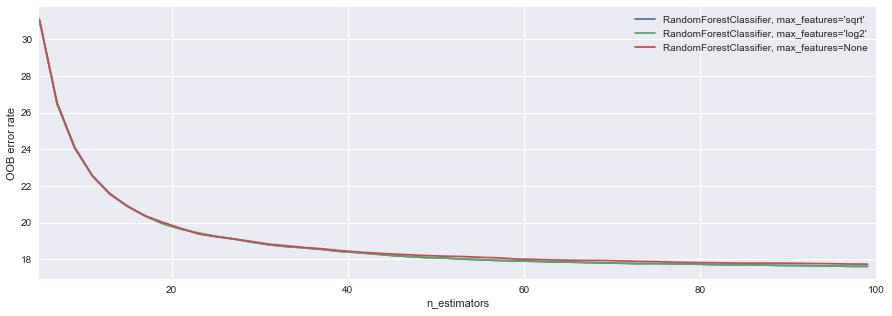

In [44]:
### Generate the "OOB error rate" vs. "n_estimators" plot.
plot_comparison = sns.plt.figure(figsize=(15,5))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right",)

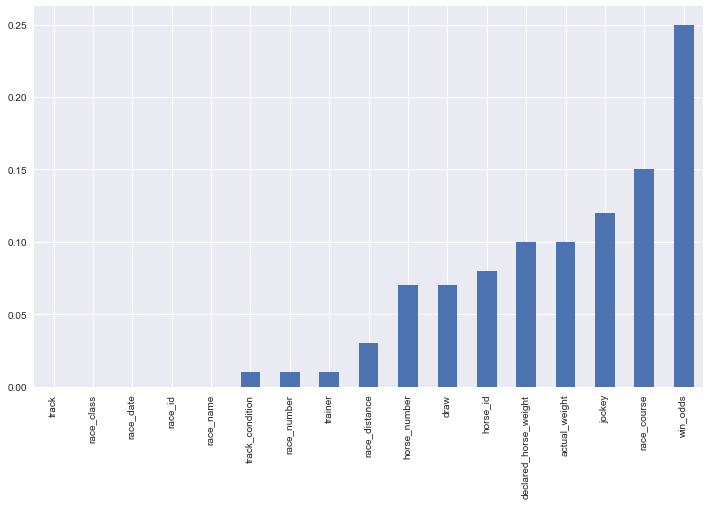

In [145]:
# The result of this plot is telling us public opinion do play an important role 
plt.figure(figsize=(12,7))

clf_rf=RandomForestClassifier(max_features='log2',n_estimators=100,max_depth=1,oob_score=True)
clf_rf=clf_rf.fit(x_training,y_training.ix[:,0])

pd.Series(data=clf_rf.feature_importances_, index=x_training.columns).sort_values().plot.bar()

In [146]:
# Training accuracy rate
clf_rf.score(x_training,y_training)

0.12946095266537255

In [147]:
# My model can only predict about 13% of the races right... poor
print(x_training.shape, x_test.shape, y_training.shape, y_test.shape)
scores = cross_val_score(clf_rf, x_test, y_test.ix[:,0], cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

(13394, 17) (6201, 17) (13394, 1) (6201, 1)
[ 0.12199037  0.13032985  0.1291364   0.12510089  0.1191248 ]
Accuracy: 0.13 (+/- 0.00)


## Will boosting yield a better result?

In [148]:
clf_boo = AdaBoostClassifier()
clf_boo = clf_boo.fit(x_training,y_training.ix[:,0])
clf_boo.score(x_training,y_training.ix[:,0])

0.10803344781245333

In [149]:
# In fact, boosting works even worse than randomforest
print(x_training.shape, x_test.shape, y_training.shape, y_test.shape)
scores = cross_val_score(clf_boo, x_test, y_test.ix[:,0], cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

(13394, 17) (6201, 17) (13394, 1) (6201, 1)
[ 0.07223114  0.08688656  0.09281679  0.10815174  0.1191248 ]
Accuracy: 0.10 (+/- 0.02)


## What if we change the base_estimator of AdaBoostClassifier?

In [60]:
import inspect
from sklearn.utils.testing import all_estimators
for name, clf in all_estimators(type_filter='classifier'):
    if 'sample_weight' in inspect.getargspec(clf().fit)[0]:
       print (name)

AdaBoostClassifier
BaggingClassifier
BernoulliNB
CalibratedClassifierCV
DecisionTreeClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianNB
GradientBoostingClassifier
LinearSVC
LogisticRegression
LogisticRegressionCV
MultinomialNB
NuSVC
Perceptron
RandomForestClassifier
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SVC


/Users/appleuser/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead


In [71]:
clf_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [150]:
clf_boo = AdaBoostClassifier(base_estimator=clf_rf)
clf_boo = clf_boo.fit(x_training,y_training.ix[:,0])
clf_boo.score(x_training,y_training.ix[:,0])

0.14551291623114829

In [151]:
# Doesn't seem to improve a lot
scores = cross_val_score(clf_boo, x_test, y_test.ix[:,0], cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 0.11075441  0.13515688  0.1291364   0.14366425  0.12236629]
Accuracy: 0.13 (+/- 0.01)


## How about KNeighborsClassifier?

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
clf_kn=KNeighborsClassifier(n_neighbors=60)
clf_kn.fit(x_training,y_training.ix[:,0])
clf_kn.score(x_training,y_training.ix[:,0])

0.13640436016126622

In [187]:
scores = cross_val_score(clf_kn, x_test, y_test.ix[:,0], cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 0.09149278  0.10297667  0.10250202  0.09281679  0.08752026]
Accuracy: 0.10 (+/- 0.01)


## Let me try the last one---GaussianMixture model

In [188]:
from sklearn import mixture

In [201]:
clf_mx = mixture.GaussianMixture(n_components=3, covariance_type='full',max_iter =1000)
clf_mx.fit(x_training,y_training.ix[:,0])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [202]:
clf_mx.score(x_training,y_training.ix[:,0])

-63.177588484505648

In [203]:
# Looks like we are onto something
scores = cross_val_score(clf_mx, x_test, y_test.ix[:,0], cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[-73.82092883 -61.01165335 -59.83070426 -59.20994948 -67.89022634]
Accuracy: -64.35 (+/- 5.66)


## What if instead of predicting which horse will win which place, I simply regard the 1st place horse as the winner, and all the rest the losers? So this question becomes a binary classification.

In [261]:
import copy

In [279]:
y_test.head(3)

,finishing_position
13653,1.0
13654,7.0
13655,8.0


In [280]:
y_training.head(3)

,finishing_position
0,1.0
1,7.0
2,8.0


In [268]:
temp_y_training=copy.deepcopy(y_training)

In [269]:
temp_y_training.head(3)

,finishing_position
0,1.0
1,7.0
2,8.0


In [270]:
temp_y_training.finishing_position.unique()

array([  1.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,   2.,   3.,
         4.,   5.,   6.,   0.])

In [271]:
temp_y_training.finishing_position.replace([7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,   2.,   3.,
         4.,   5.,   6.,   0.],0,inplace=True)

In [272]:
temp_y_training.head(3)

,finishing_position
0,1.0
1,0.0
2,0.0


In [274]:
temp_y_test=copy.deepcopy(y_test)

In [275]:
temp_y_test.finishing_position.replace([7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,   2.,   3.,
         4.,   5.,   6.,   0.],0,inplace=True)

In [276]:
temp_y_test.head(3)

,finishing_position
13653,1.0
13654,0.0
13655,0.0


In [277]:
clf_mx.score(x_training,temp_y_training.ix[:,0])

-63.177588484505648

In [278]:
clf_mx.score(x_test,temp_y_test.ix[:,0])

-74.618530566725767

## Now let me divide my dataset into smaller subsets by class

In [294]:
df3.head(3)

,finishing_position,horse_number,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,...,race_date,race_course,race_number,race_class,race_distance,track_condition,race_name,track,sectional_time,incident_report
0,1,1.0,K019,B Prebble,D Cruz,133.0,1032.0,1.0,-,1.0,...,2014-09-14,Sha Tin,1,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",13.59 22.08 23.11 23.55,\n When about to enter the trac...
1,2,2.0,S070,D Whyte,D E Ferraris,133.0,1075.0,13.0,2,8.0,...,2014-09-14,Sha Tin,1,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",13.59 22.08 23.11 23.55,\n When about to enter the trac...
2,3,10.0,P072,Y T Cheng,Y S Tsui,121.0,1065.0,3.0,2,2.0,...,2014-09-14,Sha Tin,1,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",13.59 22.08 23.11 23.55,\n When about to enter the trac...


In [296]:
df_class_1=copy.deepcopy(df3[df3.race_class=='Class 1'])
df_class_1.drop('race_class',axis=1,inplace=True)
df_class_1.head(2)

,finishing_position,horse_number,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,...,race_id,race_date,race_course,race_number,race_distance,track_condition,race_name,track,sectional_time,incident_report
42,1,5.0,N236,J Moreira,A T Millard,115.0,1179.0,11.0,-,7.0,...,2014-003,2014-09-14,Sha Tin,3,1200,GOOD TO FIRM,THE HKSAR CHIEF EXECUTIVE'S CUP (HANDICAP),"TURF - ""A"" COURSE",23.42 22.48 22.47,"\n On arrival at the Start, it ..."
43,2,8.0,P049,Y T Cheng,K W Lui,113.0,1180.0,5.0,N,5.0,...,2014-003,2014-09-14,Sha Tin,3,1200,GOOD TO FIRM,THE HKSAR CHIEF EXECUTIVE'S CUP (HANDICAP),"TURF - ""A"" COURSE",23.42 22.48 22.47,"\n On arrival at the Start, it ..."
